Proyecto Final

Inteligencia Artificial

Facultad de Ingeniería

Pontificia Universidad Javeriana

Juan Pablo Urrutia Sánchez

⚛

In [58]:
# Librerías empleadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import naive_bayes

In [59]:
# Declaración del archivo a emplear y vectores a utilizar
fn = ["bmi", "Age", "asa_status", "baseline_cancer", "baseline_charlson", "baseline_cvd", "baseline_dementia", "baseline_diabetes", "baseline_digestive", "baseline_osteoart", "baseline_psych", "baseline_pulmonary", "gender", "month","complication"]
cn = ["Sí hay riesgo", "No hay riesgo"]
data = pd.read_csv('Surgical-deepnet2.csv')

In [60]:
# Se divide el dataset, se toma el 60% para entrenamiento y el 40% (test_size = 0.4) para validación del sistema.
train, test = train_test_split(data, test_size = 0.4, stratify = data['complication'], random_state = 42)

In [61]:
# Gráficas que indican que tan relevantes pueden ser las características del dataset
# sns.pairplot(train, hue="complication", height = 2, palette = 'colorblind');

In [62]:
# Se sepraran las características de las etiquetas en ambas matrices (entrenamiento y validación)
X_train = train[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
y_train = train.complication
X_test = test[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
y_test = test.complication

In [63]:
# Se aplica el árbol de decisión con una profundidad de 3 y un estado de aleatoriedad de 1

clasif = DecisionTreeClassifier(max_depth = 3, random_state = 1)
clasif.fit(X_train,y_train)
prediction = clasif.predict(X_test)

In [64]:
# Descomentar para visualizar el esquemático del árbol de decisión planteado inicialmente.

# plt.figure(figsize = (40,38))
# plot_tree(clasif, feature_names = fn, class_names = cn, filled = True, proportion = True);

El accuracy del árbol de decisión es 0.799

El F1 del árbol de decisión es 0.610

Resultado de la validación cruzada del árbol de decisión
[0.79590094 0.80017079 0.78906917 0.78394535 0.8025641 ]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


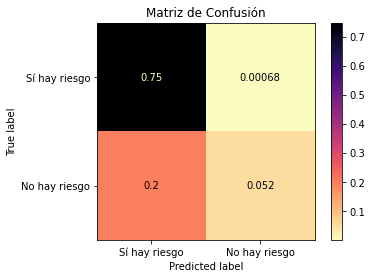

In [66]:
print('El accuracy del árbol de decisión es',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))
accuracy_i = metrics.accuracy_score(prediction,y_test)
print()
print('El F1 del árbol de decisión es',"{:.3f}".format(metrics.f1_score(prediction,y_test,average='macro')))
f1_i = metrics.f1_score(prediction,y_test,average='macro')
print()
print('Resultado de la validación cruzada del árbol de decisión')
cv_i = model_selection.cross_val_score(clasif, X_test, y_test, cv=5)
print(cv_i)
print()
disp = metrics.plot_confusion_matrix(clasif, X_test, y_test, display_labels=cn, cmap=plt.cm.magma_r, normalize='all')
disp.ax_.set_title('Matriz de Confusión');

A partir de aquí se realiza la iteración entre la profundidad del árbol de decisión y el porcentaje de datos que se manejan para validación del sistema.

In [67]:
mej_size = 0        # Mejor porcentaje de datos que se emplearán para validación del sistema
mej_depth = 0       # Mejor profundidad del árbol de decisión
act_precition = 0   # Mejor Accuracy (con los parámetros que se iteran)

for i in range(30):   # Se itera el porcentaje de datos que se manejan para validación [1/31 : 30/31]
  train, test = train_test_split(data, test_size = (i+1)/31, stratify = data['complication'], random_state = 42)
  X_train = train[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
  y_train = train.complication
  X_test = test[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
  y_test = test.complication

  for j in range(30): # Se itera la profundidad del árbol de decisión
    clasif = DecisionTreeClassifier(max_depth = j+1, random_state = 1)
    clasif.fit(X_train,y_train)
    prediction = clasif.predict(X_test)

    if metrics.accuracy_score(prediction,y_test) >= act_precition: # Se actualizan las variables en caso de que se haya encontrado un mejor Accuracy
      act_precition = metrics.accuracy_score(prediction,y_test)
      mej_depth = j+1
      mej_size = (i+1)/31
      
    # Descomentar la siguiente línea para ver cómo van cambiando los valores a lo largo del cálculo
    # print('tamaño de muestras', (i+1)/31, 'profundidad', j+1, 'accuracy', "{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

print('El mejor tamaño de muestras para validación es', "{:.3f}".format(mej_size), ', lo que significa que el tamaño de muestras para entrenamiento es', "{:.3f}".format(1-mej_size))
print()
print('La mejor profundidad es', mej_depth)
print()
print('El accuracy del árbol de decisión es',"{:.3f}".format(act_precition))

El mejor tamaño de muestras para validación es 0.032 , lo que significa que el tamaño de muestras para entrenamiento es 0.968

La mejor profundidad es 14

El accuracy del árbol de decisión es 0.939


In [68]:
# Se realiza, de nuevo, el cálculo del árbol de decisión con los mejores valores encontrados

train, test = train_test_split(data, test_size = mej_size, stratify = data['complication'], random_state = 42)
X_train = train[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
y_train = train.complication
X_test = test[['bmi','Age','asa_status','baseline_cancer','baseline_charlson','baseline_cvd','baseline_dementia','baseline_diabetes','baseline_digestive','baseline_osteoart','baseline_psych','baseline_pulmonary','gender','month']]
y_test = test.complication
clasif = DecisionTreeClassifier(max_depth = mej_depth, random_state = 1)
clasif.fit(X_train,y_train)
prediction = clasif.predict(X_test)

El accuracy del árbol de decisión es 0.939

Resultado de la validación cruzada
[0.90526316 0.84210526 0.82105263 0.86170213 0.82978723]

El F1 del árbol de decisión es 0.912

El coeficiente de Silueta del árbol de decisión es -0.0007



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


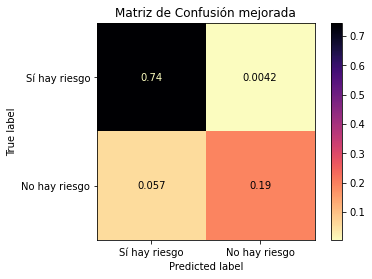

In [69]:
# Resultados de la validación con los moejores valores enontrados para profundidad y tamaño de matriz de evaluación
print('El accuracy del árbol de decisión es',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))
accuracy_f = metrics.accuracy_score(prediction,y_test)
print()
print('Resultado de la validación cruzada')
cv_f = model_selection.cross_val_score(clasif, X_test, y_test, cv=5)
print(cv_f)
print()
print('El F1 del árbol de decisión es',"{:.3f}".format(metrics.f1_score(prediction,y_test,average='macro')))
f1_f = metrics.f1_score(prediction,y_test,average='macro')
print()
print('El coeficiente de Silueta del árbol de decisión es',"{:.4f}".format(metrics.silhouette_score(X_test, y_test, metric='euclidean')))
print()
disp = metrics.plot_confusion_matrix(clasif, X_test, y_test, display_labels=cn, cmap=plt.cm.magma_r, normalize='all')
disp.ax_.set_title('Matriz de Confusión mejorada');

In [48]:
# Descomentar para visualizar el esquema del árbol de decisión final, con valores óptimos

# plt.figure(figsize = (40,38))
# plot_tree(clasif, feature_names = fn, class_names = cn, filled = True, proportion = True);

In [74]:
#Concluiones

print('El accuracy del árbol de decisión mejoró',"{:.3f}".format(accuracy_f - accuracy_i))
print()
print('El F1 del árbol de decisión mejoró',"{:.3f}".format(f1_f - f1_i))

El accuracy del árbol de decisión mejoró 0.140

El F1 del árbol de decisión mejoró 0.302
